<a href="https://colab.research.google.com/github/rodrigorissettoterra/Python_estudos/blob/main/NumPy_Analise_num%C3%A9rica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Desenvolvimento de notebook de estudo, utilizando a biblioteca NumPy.

Importando as bibliotecas necessárias.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Carregando a base de dados e armazenando na variável "dado".

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/rodrigorissettoterra/Python_estudos/main/apple_prices.csv", sep=";")
df

,Date,Data_Ano_Mes,Data_Ano_Mes_Dia,Moscow,Kaliningrad,Petersburg,Krasnodar,Ekaterinburg
0,20130101,2013-01,2013-01-01,79.72,42.67,62.55,48.26,71.25
1,20130201,2013-02,2013-02-01,81.08,44.37,62.73,51.01,71.35
2,20130301,2013-03,2013-03-01,79.68,44.73,63.43,50.91,70.90
3,20130401,2013-04,2013-04-01,79.80,46.75,63.83,53.94,71.92
4,20130501,2013-05,2013-05-01,80.63,71.85,66.06,61.27,72.91
...,...,...,...,...,...,...,...,...
82,20191101,2019-11,2019-11-01,97.83,78.98,95.75,68.11,96.25
83,20191201,2019-12,2019-12-01,101.07,76.55,97.09,73.48,100.12
84,20200101,2020-01,2020-01-01,103.44,74.89,98.18,82.04,101.29
85,20200201,2020-02,2020-02-01,108.23,70.00,103.10,81.19,102.81


Informações sobre a base de dados utilizada.

In [3]:
print("Os dados possuem",df.ndim,"Dimensões.")
print("A quantidade total de registros é de:",df.size,"registros.")
print("Divididos em",df.shape[0],"colunas e",df.shape[1],"linhas.")
print("O dataset possui:",df.isna().sum().sum(),"valor definido como NaN.")

Os dados possuem 2 Dimensões.
A quantidade total de registros é de: 696 registros.
Divididos em 87 colunas e 8 linhas.
O dataset possui: 0 valor definido como NaN.


Informações estatísticas sobre a base de dados utilizada.

In [4]:
df.describe()

,Date,Moscow,Kaliningrad,Petersburg,Krasnodar,Ekaterinburg
count,8.700000e+01,87.000000,87.000000,87.000000,87.000000,87.000000
mean,2.016201e+07,98.797816,74.811379,95.150230,72.006897,100.250345
std,2.105939e+04,15.534907,17.398672,18.976296,16.820114,18.596763
min,2.013010e+07,73.390000,42.670000,62.130000,42.120000,68.580000
25%,2.014105e+07,80.940000,63.845000,75.620000,58.550000,81.645000
50%,2.016080e+07,99.100000,75.670000,97.840000,70.040000,103.160000
75%,2.018055e+07,109.145000,83.535000,110.095000,82.035000,114.805000
max,2.020030e+07,131.890000,119.540000,131.120000,116.120000,133.290000


Primeiras visualizações

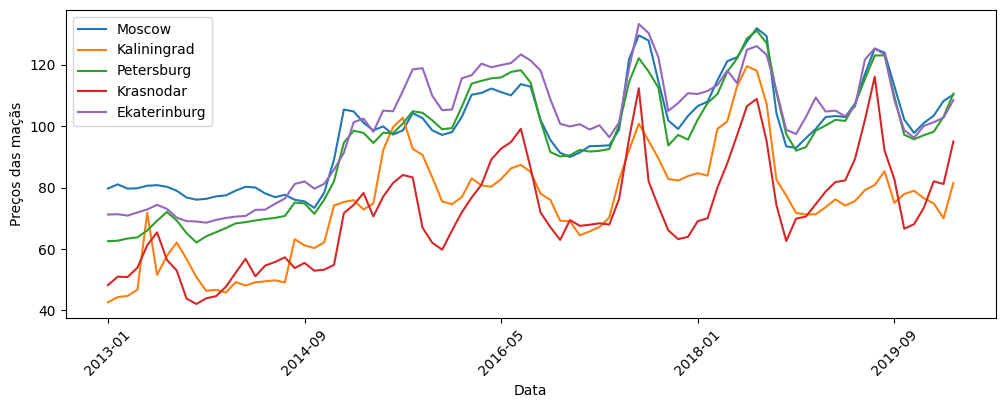

In [5]:
df.plot(x='Data_Ano_Mes', y=['Moscow', 'Kaliningrad', 'Petersburg', 'Krasnodar', 'Ekaterinburg'], figsize=(12, 4))
plt.xlabel("Data")
plt.ylabel("Preços das maçãs")
plt.xticks(rotation=45)

plt.show()

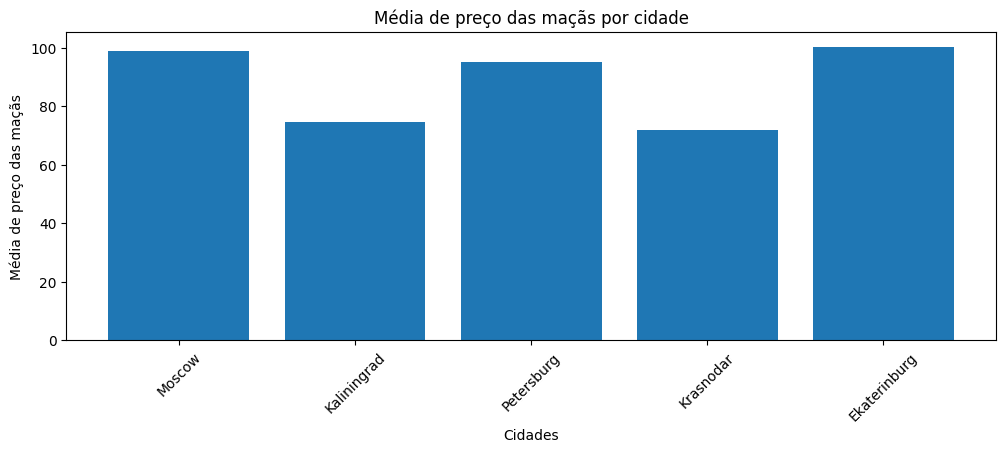

In [6]:
media_Moscow = df['Moscow'].mean()
media_Kaliningrad = df['Kaliningrad'].mean()
media_Petersburg = df['Petersburg'].mean()
media_Krasnodar = df['Krasnodar'].mean()
media_Ekaterinburg = df['Ekaterinburg'].mean()

cidades = ['Moscow', 'Kaliningrad', 'Petersburg', 'Krasnodar', 'Ekaterinburg']
medias = [media_Moscow, media_Kaliningrad, media_Petersburg, media_Krasnodar, media_Ekaterinburg]

plt.figure(figsize=(12, 4))
plt.bar(cidades, medias)
plt.xlabel("Cidades")
plt.ylabel("Média de preço das maçãs")
plt.title("Média de preço das maçãs por cidade")
plt.xticks(rotation=45)
plt.show()

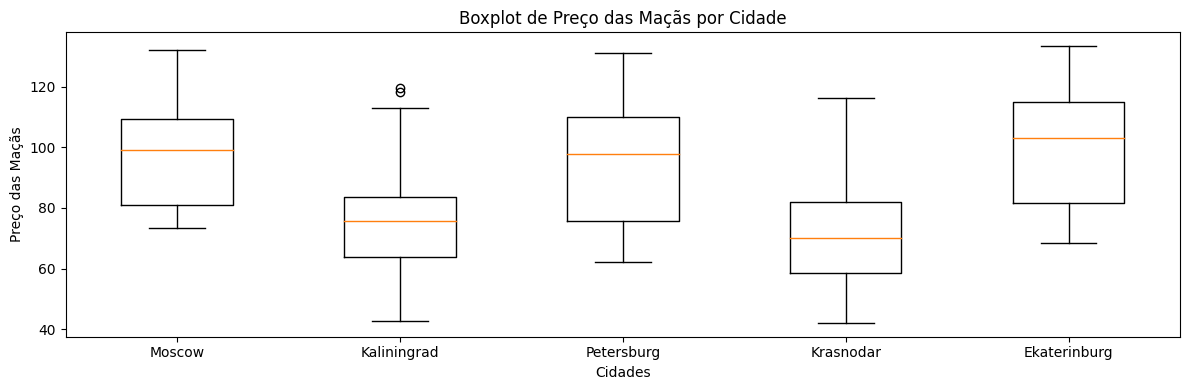

In [7]:
plt.figure(figsize=(12, 4))

plt.boxplot([df[cidade] for cidade in cidades], labels=cidades, vert=True)
plt.xlabel('Cidades')
plt.ylabel('Preço das Maçãs')
plt.title('Boxplot de Preço das Maçãs por Cidade')

plt.tight_layout()
plt.show()

Testes estatísticos

Teste t de Student (para comparação entre duas cidades):

In [8]:
from scipy.stats import ttest_ind

resultado_ttest = ttest_ind(df['Moscow'], df['Kaliningrad'], equal_var=False)

print("Resultado do teste t de Student:")
print(f"Estatística do teste t: {resultado_ttest.statistic}")
print(f'Valor-p: {resultado_ttest.pvalue}')

Resultado do teste t de Student:
Estatística do teste t: 9.591954375341393
Valor-p: 1.1052827986710726e-17


Com base nos resultados do teste t de Student:

-  Estatística do teste t: A diferença nos preços das maçãs entre as cidades comparadas é considerável.

-  Valor-p: O valor-p extremamente baixo indica fortes evidências estatísticas de que há diferenças significativas nos preços das maçãs entre as cidades que foram testadas. Isso sugere que as médias dos preços das maçãs nas cidades não são iguais e são estatisticamente diferentes umas das outras.

ANOVA (para comparação entre mais de duas cidades):

In [9]:
from scipy.stats import f_oneway

resultado_anova = f_oneway(df['Moscow'], df['Kaliningrad'], df['Petersburg'], df['Krasnodar'], df['Ekaterinburg'])

print("Resultado da ANOVA:")
print(f"Estatística da ANOVA: {resultado_anova.statistic}")
print(f'Valor-p: {resultado_anova.pvalue}')

Resultado da ANOVA:
Estatística da ANOVA: 53.01646291510888
Valor-p: 2.6516282736090817e-36


-    Estatística da ANOVA: A diferença entre as médias dos preços das maçãs entre as cidades comparadas é considerável.

-    Valor-p: O valor-p extremamente baixo sugere fortes evidências estatísticas de que há diferenças significativas nos preços das maçãs entre as cidades testadas. Isso indica que as médias dos preços das maçãs nas cidades não são iguais e são estatisticamente diferentes umas das outras.

Correlações

In [10]:
matriz_correlacao = df[['Moscow', 'Kaliningrad', 'Petersburg', 'Krasnodar', 'Ekaterinburg']].corr()

print("Matriz de Correlação:")
print(matriz_correlacao)

Matriz de Correlação:
                Moscow  Kaliningrad  Petersburg  Krasnodar  Ekaterinburg
Moscow        1.000000     0.865363    0.964693   0.908353      0.926812
Kaliningrad   0.865363     1.000000    0.886560   0.794460      0.867499
Petersburg    0.964693     0.886560    1.000000   0.904344      0.968808
Krasnodar     0.908353     0.794460    0.904344   1.000000      0.852895
Ekaterinburg  0.926812     0.867499    0.968808   0.852895      1.000000


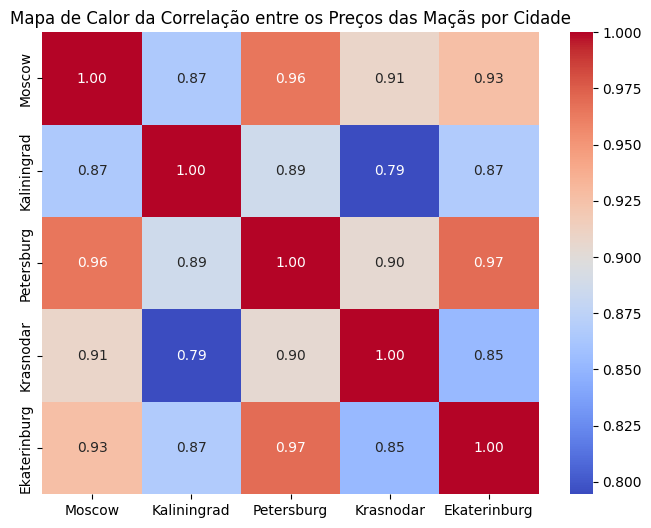

In [11]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor da Correlação entre os Preços das Maçãs por Cidade')
plt.show()

Interpretação:

Essa matriz de correlação mostra os coeficientes de correlação entre várias cidades (Moscow, Kaliningrad, Petersburg, Krasnodar, Ekaterinburg) em relação aos preços das maçãs. Aqui está uma interpretação geral dos valores na matriz:

-   Moscow em relação às outras cidades:
      Moscow apresenta forte correlação positiva com todas as outras cidades em relação aos preços das maçãs, variando de 0.865 a 0.964. Isso sugere uma tendência em que os preços das maçãs em Moscow têm uma relação positiva forte e consistente com os preços nas outras cidades.
-    Correlação entre outras cidades:
      As outras cidades também mostram correlações positivas entre si em relação aos preços das maçãs. Por exemplo:
 -       Kaliningrad tem uma forte correlação com Petersburg (0.886) e Ekaterinburg (0.867), mas um pouco mais fraca com Moscow (0.865) e Krasnodar (0.794).
  -      Petersburg apresenta uma correlação forte com Moscow (0.964) e Ekaterinburg (0.969), mas um pouco mais fraca com Kaliningrad (0.887) e Krasnodar (0.904).
  -      Krasnodar tem correlações mais moderadas, variando de 0.795 a 0.904 com outras cidades.
  -     Ekaterinburg tem correlações fortes com Moscow (0.927), Petersburg (0.969), e correlações um pouco mais moderadas com Kaliningrad (0.867) e Krasnodar (0.853).

Esses valores indicam que os preços das maçãs entre as cidades estão correlacionados de maneira positiva. Por exemplo, se os preços das maçãs aumentam em uma cidade, é mais provável que também aumentem em outras cidades. No entanto, as forças e padrões específicos dessas correlações variam entre as cidades, o que pode indicar diferentes comportamentos de mercado ou influências regionais nos preços das maçãs em cada localidade.